## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [4]:
#写入代码
from sklearn.model_selection import train_test_split


In [41]:
#写入代码
data = pd.read_csv('clear_data.csv')
train = pd.read_csv('train.csv')
X = data
y = train['Survived']



,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,2,3,26.0,0,0,7.9250,1,0,0,0,1
3,3,1,35.0,1,0,53.1000,1,0,0,0,1
4,4,3,35.0,0,0,8.0500,0,1,0,0,1


In [37]:
#写入代码
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


In [7]:
#写入代码
lr = LogisticRegression(max_iter=1000000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000000)

### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结

In [34]:
#思考回答：



#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

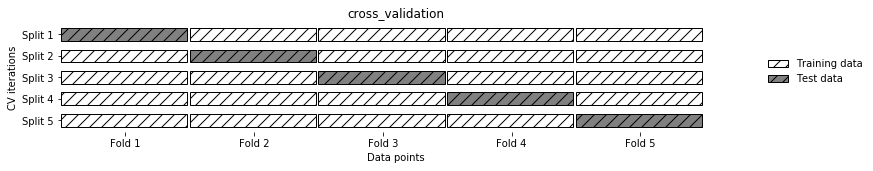

In [6]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [9]:
from sklearn.model_selection import cross_val_score

In [11]:
#写入代码

lr = LogisticRegression(C=100,max_iter=1000000)
scores = cross_val_score(lr, X_train, y_train, cv=10)
scores

array([0.82089552, 0.7761194 , 0.82089552, 0.79104478, 0.85074627,
       0.86567164, 0.73134328, 0.85074627, 0.75757576, 0.71212121])

In [12]:
#写入代码
scores.mean()


0.7977159656264134

In [13]:
#写入代码
print("Average cross-validation score: {:.5f}".format(scores.mean()))# str.format() 格式化数字


Average cross-validation score: 0.79772


In [1]:
#写入代码



#### 思考4
* k折越多的情况下会带来什么样的影响？

In [35]:
#思考回答



#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

In [37]:
#思考回答
#参考回答：https://www.jianshu.com/p/65afca09fab1


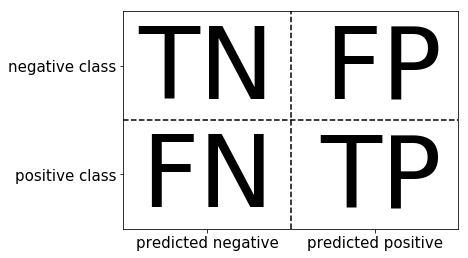

In [40]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

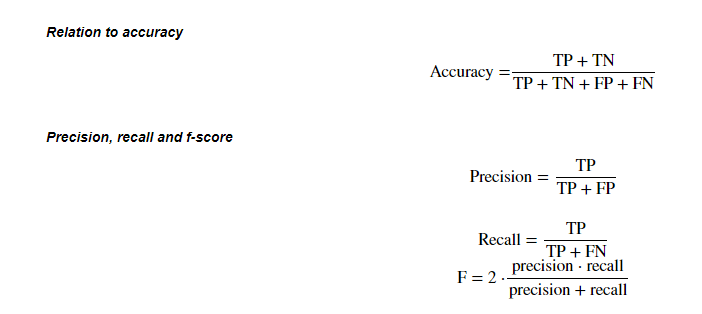

In [42]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

TP，TN既被正确预测的结果，positiv 和 negative 代表预测正确阳性或者阴性的结果，Sensitivity (或 Recall) 表示实际患者中，预测患病成功的概率，Specificity就是用来表示实际未患病的人群中，预测未患病成功的概率。Precision 的含义是预测患病的样本中，实际也患病的比例；这样，将 Precision 和 Sensitivity 结合起来，会让我们更专注于患病 (正样本) 的预测效果，


#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

In [14]:
#写入代码

from sklearn.metrics import confusion_matrix

In [15]:
#写入代码
lr = LogisticRegression(C=100,max_iter=1000000)
lr.fit(X_train, y_train)


LogisticRegression(C=100, max_iter=1000000)

In [17]:
#写入代码
# 模型预测结果
pred = lr.predict(X_train)


In [19]:
#写入代码
from sklearn.metrics import classification_report


In [20]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       412
           1       0.75      0.72      0.74       256

    accuracy                           0.80       668
   macro avg       0.79      0.79      0.79       668
weighted avg       0.80      0.80      0.80       668



【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

In [43]:
#思考回答



#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是OCR曲线，OCR曲线的存在是为了解决什么问题？

In [44]:
#思考
#「曲线越靠近左上角，模型的效果越好」，意味着一个更好模型，其曲线下方的面积更大，我们把 ROC 曲线下方的面积称为 AUC (Area Under Curve)



#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好

In [29]:
#写入代码
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

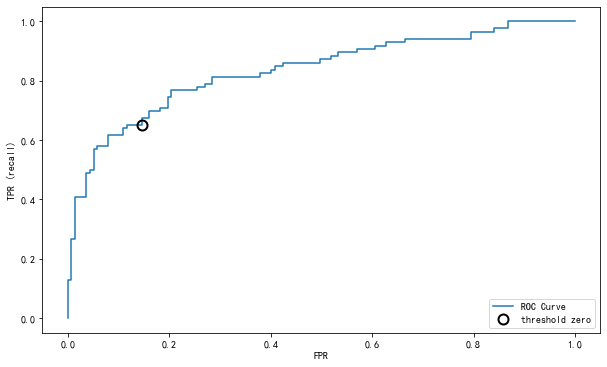

In [30]:
#写入代码
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值???
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [31]:
#写入代码
#TPR=1，FPR=0,即图中(0,1)点，故ROC曲线越靠拢(0,1)点，越偏离45度对角线越好，Sensitivity、Specificity越大效果越好。


In [38]:
#写入代码
sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
sklearn.metrics.roc_auc_score()函数用法


#### 思考6
* 对于多分类问题如何绘制ROC曲线

In [45]:
#思考回答




【思考】你能从这条OCR曲线的到什么信息？这些信息可以做什么？

In [ ]:
#思考回答

